In [1]:
# 1
# Load The dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
#print(data.keys())

# Store data points in X and labels in y
X =  data['data']
y = data['target']

# Print the sizes of the dataset
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1]) 
print("Output Classes = ", data['target_names'])
print("List of Feature Names = ", data['feature_names'])

Number of Examples in the Dataset =  569
Number of Features for each example =  30
Output Classes =  ['malignant' 'benign']
List of Feature Names =  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [2]:
# 2
# Split the dataset into training set and test set with a 0.7-0.3 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print ("Number of examples in training set = ", X_train.shape[0])
print ("Number of examples in test set = ", X_test.shape[0])

(398, 30)
(398,)
(171, 30)
(171,)
Number of examples in training set =  398
Number of examples in test set =  171


In [3]:
# 3
# Preprocessing
# scale the input features in the training set to have mean equal 0 and variance equal to 1 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# convert output values from ['malignant', 'benign'] to [1, 0].
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [4]:
# 4
# define a seed for random number generator so the result will be reproducible
import numpy
seed = 1
numpy.random.seed(seed)

from keras.models import Sequential
from keras.layers import Dense
# define the keras model
classifier = Sequential()
classifier.add(Dense(units = 8, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# train the model while storing all loss values
history=classifier.fit(X_train, y_train, batch_size = 5, epochs = 100, validation_data=(X_test, y_test))

Using TensorFlow backend.


Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 3s 7ms/step - loss: 0.6250 - acc: 0.6432 - val_loss: 0.5130 - val_acc: 0.8889
Epoch 2/100
398/398 [==============================] - 0s 846us/step - loss: 0.4224 - acc: 0.9070 - val_loss: 0.3775 - val_acc: 0.9064
Epoch 3/100
398/398 [==============================] - 0s 789us/step - loss: 0.3058 - acc: 0.9372 - val_loss: 0.2747 - val_acc: 0.9123
Epoch 4/100
398/398 [==============================] - 0s 772us/step - loss: 0.2186 - acc: 0.9497 - val_loss: 0.2092 - val_acc: 0.9240
Epoch 5/100
398/398 [==============================] - 0s 832us/step - loss: 0.1638 - acc: 0.9548 - val_loss: 0.1749 - val_acc: 0.9357
Epoch 6/100
398/398 [==============================] - 0s 828us/step - loss: 0.1342 - acc: 0.9598 - val_loss: 0.1534 - val_acc: 0.9357
Epoch 7/100
398/398 [==============================] - 0s 877us/step - loss: 0.1152 - acc: 0.9648 - val_loss: 0.1390 - val_acc: 0.9357
Epoch 8/100

Epoch 61/100
398/398 [==============================] - 0s 868us/step - loss: 0.0182 - acc: 0.9925 - val_loss: 0.1487 - val_acc: 0.9591
Epoch 62/100
398/398 [==============================] - 0s 793us/step - loss: 0.0185 - acc: 0.9950 - val_loss: 0.1488 - val_acc: 0.9591
Epoch 63/100
398/398 [==============================] - 0s 839us/step - loss: 0.0177 - acc: 0.9925 - val_loss: 0.1580 - val_acc: 0.9591
Epoch 64/100
398/398 [==============================] - 0s 794us/step - loss: 0.0170 - acc: 0.9950 - val_loss: 0.1518 - val_acc: 0.9649
Epoch 65/100
398/398 [==============================] - 0s 798us/step - loss: 0.0167 - acc: 0.9950 - val_loss: 0.1569 - val_acc: 0.9649
Epoch 66/100
398/398 [==============================] - 0s 834us/step - loss: 0.0161 - acc: 0.9950 - val_loss: 0.1611 - val_acc: 0.9591
Epoch 67/100
398/398 [==============================] - 0s 753us/step - loss: 0.0154 - acc: 0.9950 - val_loss: 0.1605 - val_acc: 0.9649
Epoch 68/100
398/398 [==========================

Best Accuracy on training set =  1.0
Best Accuray on test set =  0.9883040942643818


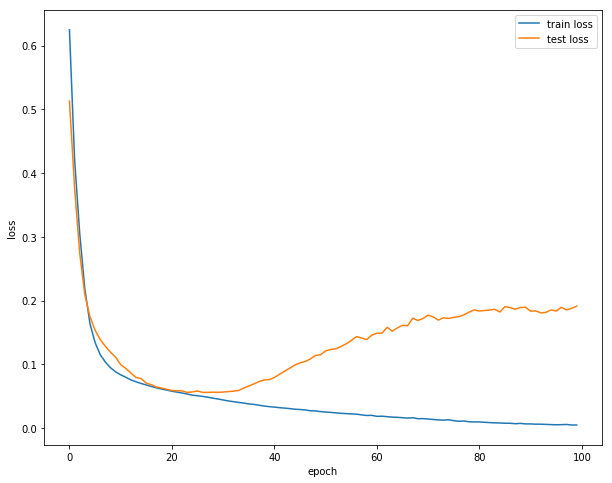

In [5]:
# 5
# import require packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 

# plot training error and test error plots 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

# print the best accuracy reached on training set and the test set
print("Best Accuracy on training set = ", max(history.history['acc']))
print("Best Accuray on test set = ", max(history.history['val_acc']))

In [6]:
# 6
# define a seed for random number generator so the result will be reproducible
numpy.random.seed(seed)

# define the keras model
classifier = Sequential()
classifier.add(Dense(units = 4, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 4, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# train the model while storing all loss values
history=classifier.fit(X_train, y_train, batch_size = 5, epochs = 100, validation_data=(X_test, y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 1s 2ms/step - loss: 0.6259 - acc: 0.6884 - val_loss: 0.5465 - val_acc: 0.7544
Epoch 2/100
398/398 [==============================] - 0s 945us/step - loss: 0.4743 - acc: 0.8317 - val_loss: 0.3952 - val_acc: 0.8830
Epoch 3/100
398/398 [==============================] - 0s 975us/step - loss: 0.3223 - acc: 0.9196 - val_loss: 0.2729 - val_acc: 0.9240
Epoch 4/100
398/398 [==============================] - 0s 856us/step - loss: 0.2154 - acc: 0.9447 - val_loss: 0.2030 - val_acc: 0.9298
Epoch 5/100
398/398 [==============================] - 0s 905us/step - loss: 0.1584 - acc: 0.9598 - val_loss: 0.1669 - val_acc: 0.9298
Epoch 6/100
398/398 [==============================] - 0s 890us/step - loss: 0.1309 - acc: 0.9623 - val_loss: 0.1477 - val_acc: 0.9298
Epoch 7/100
398/398 [==============================] - 0s 923us/step - loss: 0.1160 - acc: 0.9598 - val_loss: 0.1347 - val_acc: 0.9415
Epoch 8/100

Epoch 61/100
398/398 [==============================] - 0s 879us/step - loss: 0.0224 - acc: 0.9899 - val_loss: 0.1814 - val_acc: 0.9649
Epoch 62/100
398/398 [==============================] - 0s 882us/step - loss: 0.0223 - acc: 0.9899 - val_loss: 0.1766 - val_acc: 0.9649
Epoch 63/100
398/398 [==============================] - 0s 880us/step - loss: 0.0221 - acc: 0.9899 - val_loss: 0.1841 - val_acc: 0.9649
Epoch 64/100
398/398 [==============================] - 0s 882us/step - loss: 0.0212 - acc: 0.9899 - val_loss: 0.1879 - val_acc: 0.9649
Epoch 65/100
398/398 [==============================] - 0s 921us/step - loss: 0.0210 - acc: 0.9899 - val_loss: 0.1937 - val_acc: 0.9649
Epoch 66/100
398/398 [==============================] - 0s 880us/step - loss: 0.0209 - acc: 0.9899 - val_loss: 0.2056 - val_acc: 0.9591
Epoch 67/100
398/398 [==============================] - 0s 919us/step - loss: 0.0201 - acc: 0.9950 - val_loss: 0.2013 - val_acc: 0.9591
Epoch 68/100
398/398 [==========================

Best Accuracy on training set =  1.0
Best Accuray on test set =  0.9766081885287636


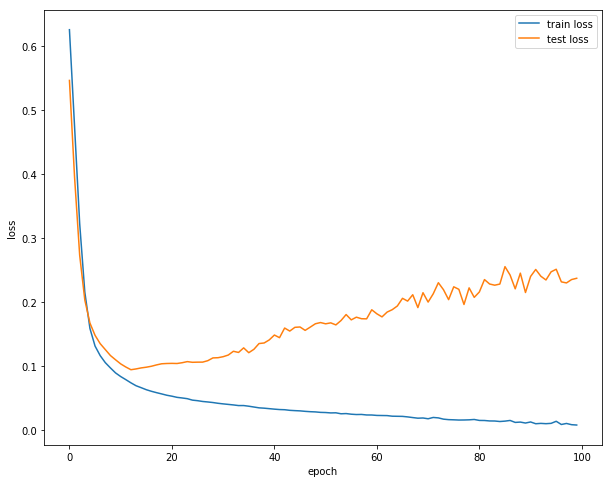

In [7]:
# 6
# plot training error and test error plots 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

# print the best accuracy reached on training set and the test set
print("Best Accuracy on training set = ", max(history.history['acc']))
print("Best Accuray on test set = ", max(history.history['val_acc']))

In [8]:
# 7
# define a seed for random number generator so the result will be reproducible
numpy.random.seed(seed)
# define the keras model
classifier = Sequential()
classifier.add(Dense(units = 16, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# train the model while storing all loss values
history=classifier.fit(X_train, y_train, batch_size = 5, epochs = 100, validation_data=(X_test, y_test))

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - ETA: 0s - loss: 0.5759 - acc: 0.713 - 1s 2ms/step - loss: 0.5630 - acc: 0.7211 - val_loss: 0.4344 - val_acc: 0.8596
Epoch 2/100
398/398 [==============================] - 0s 849us/step - loss: 0.3588 - acc: 0.9045 - val_loss: 0.2843 - val_acc: 0.9240
Epoch 3/100
398/398 [==============================] - 0s 920us/step - loss: 0.1998 - acc: 0.9497 - val_loss: 0.1602 - val_acc: 0.9591
Epoch 4/100
398/398 [==============================] - 0s 940us/step - loss: 0.1288 - acc: 0.9648 - val_loss: 0.1151 - val_acc: 0.9415
Epoch 5/100
398/398 [==============================] - 0s 894us/step - loss: 0.1022 - acc: 0.9698 - val_loss: 0.0951 - val_acc: 0.9532
Epoch 6/100
398/398 [==============================] - 0s 1ms/step - loss: 0.0866 - acc: 0.9749 - val_loss: 0.0818 - val_acc: 0.9766
Epoch 7/100
398/398 [==============================] - 0s 850us/step - loss: 0.0757 - acc: 0.9799 - val_loss: 

Epoch 61/100
398/398 [==============================] - 0s 957us/step - loss: 9.9383e-04 - acc: 1.0000 - val_loss: 0.2169 - val_acc: 0.9708
Epoch 62/100
398/398 [==============================] - 0s 926us/step - loss: 8.9298e-04 - acc: 1.0000 - val_loss: 0.2132 - val_acc: 0.9708
Epoch 63/100
398/398 [==============================] - 0s 865us/step - loss: 8.8329e-04 - acc: 1.0000 - val_loss: 0.2170 - val_acc: 0.9708
Epoch 64/100
398/398 [==============================] - 0s 976us/step - loss: 8.0201e-04 - acc: 1.0000 - val_loss: 0.2196 - val_acc: 0.9708
Epoch 65/100
398/398 [==============================] - 0s 921us/step - loss: 7.3237e-04 - acc: 1.0000 - val_loss: 0.2166 - val_acc: 0.9708
Epoch 66/100
398/398 [==============================] - 0s 922us/step - loss: 7.7154e-04 - acc: 1.0000 - val_loss: 0.2273 - val_acc: 0.9708
Epoch 67/100
398/398 [==============================] - 0s 963us/step - loss: 7.4256e-04 - acc: 1.0000 - val_loss: 0.2175 - val_acc: 0.9708
Epoch 68/100
398/398

Best Accuracy on training set =  1.0
Best Accuray on test set =  0.9766081885287636


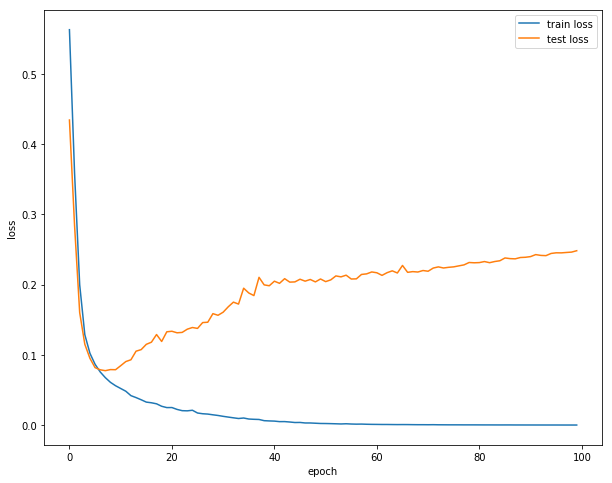

In [9]:
# 7
# plot training error and test error plots 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'test loss'], loc='upper right')

# print the best accuracy reached on training set and the test set
print("Best Accuracy on training set = ", max(history.history['acc']))
print("Best Accuray on test set = ", max(history.history['val_acc']))